In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

## Loading Data: (Online Retail-Giftshop data)

In [2]:
# Loading from the excel files:
data_0910= pd.read_excel("online_retail_II.xlsx",sheet_name = "Year 2009-2010", dtype = str )
data_1011= pd.read_excel("online_retail_II.xlsx",sheet_name = "Year 2010-2011", dtype = str )

data_all = data_0910.append(data_1011)

KeyboardInterrupt: 

In [ ]:
data_all

In [ ]:
data_all.shape

In [3]:
# Pickle for efficient saving and loading of different files and format with memory management:
import pickle

In [4]:
#pickle.dump( data_all, open( "data_all_onlineretail.p", "wb" ) )

In [5]:
df = pickle.load( open( "data_all_onlineretail.p", "rb" ))

In [6]:
df.shape

(1067371, 8)

In [7]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


### Data Processing:

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [8]:
df['Quantity'] = df['Quantity'].astype(float)
df['Price'] = df['Price'].astype(float)
df['InvoiceDate'] =  pd.to_datetime(df["InvoiceDate"])

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [10]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

### Packages for preliminary understanding of the data:
- pip install dtale
- pip install sweetviz
- pip install autoviz

In [11]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [15]:
# import dtale
# import plotly.express as px 

# d = dtale.show(df)

# d.open_browser()

# Data Processing:

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [14]:
# Removing those missing customer ID's:
df_v2 = df.loc[~df['Customer ID'].isna()].reset_index(drop=True)

In [15]:
df_v2.shape

(824364, 8)

In [16]:
# Creating Revenue columns:
df_v2['Revenue'] = df_v2['Quantity']*df_v2['Price']

In [17]:
df_UK = df_v2.loc[df_v2['Country']=="United Kingdom"].reset_index(drop=True)

In [ ]:
df_UK

In [18]:
df_UK.describe()

,Quantity,Price,Revenue
count,741301.000000,741301.000000,741301.000000
mean,11.268705,3.459329,18.624584
std,190.347079,69.683407,323.262764
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,3.900000
50%,4.000000,1.950000,10.200000
75%,12.000000,3.750000,17.700000
max,80995.000000,38970.000000,168469.600000


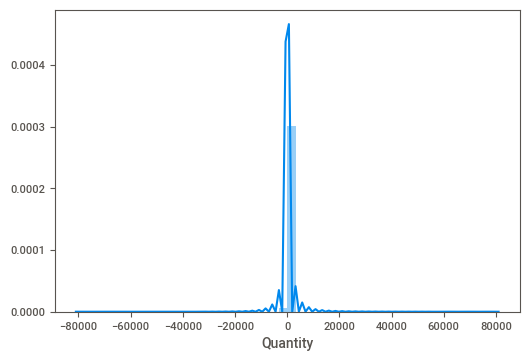

In [19]:
sns.distplot(df_UK["Quantity"])

In [20]:
# Creating Monthly columns:
df_UK['Date'] = df_UK['InvoiceDate'].dt.date
df_UK['Month'] = df_UK['InvoiceDate'].dt.month
df_UK['Quarter'] = df_UK['InvoiceDate'].dt.quarter
df_UK['Year'] = df_UK['InvoiceDate'].dt.year

In [21]:
df_UK.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Date,Month,Quarter,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01,12,4,2009
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,12,4,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,12,4,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12-01,12,4,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12-01,12,4,2009


In [22]:
df_UK[['Month','Quarter','Year']].drop_duplicates().reset_index(drop=True).sort_values(['Year','Quarter','Month'])

,Month,Quarter,Year
0,12,4,2009
1,1,1,2010
2,2,1,2010
3,3,1,2010
4,4,2,2010
5,5,2,2010
6,6,2,2010
7,7,3,2010
8,8,3,2010
9,9,3,2010


In [23]:
len(df_UK['Customer ID'].unique())

5410

### Creating RECENCY, FREQUENCY, MONETARY Fields at customer level

In [24]:
df_daily_revenue = df_UK.groupby(['Customer ID','Date','Month','Quarter','Year']).agg({'Revenue':'sum'}).reset_index(drop=False)

In [25]:
df_daily_revenue

,Customer ID,Date,Month,Quarter,Year,Revenue
0,12346,2009-12-14,12,4,2009,90.00
1,12346,2009-12-18,12,4,2009,23.50
2,12346,2010-01-04,1,1,2010,45.00
3,12346,2010-01-14,1,1,2010,22.50
4,12346,2010-01-22,1,1,2010,22.50
...,...,...,...,...,...,...
34889,18287,2010-09-21,9,3,2010,892.60
34890,18287,2010-11-22,11,4,2010,381.50
34891,18287,2011-05-22,5,2,2011,765.28
34892,18287,2011-10-12,10,4,2011,1001.32


In [26]:
df_daily_revenue['Frequency'] = 1

In [27]:
CURRENT_DATE = df_daily_revenue['Date'].max()
print(CURRENT_DATE)

2011-12-09


In [28]:
df_cust = df_daily_revenue.groupby(['Customer ID']).agg({'Revenue':'sum','Frequency':'sum','Date':'max'}).reset_index(drop=False)

In [29]:
df_cust['Recency'] = CURRENT_DATE - df_cust['Date']

In [30]:
df_cust['Recency'] = df_cust['Recency'].astype('timedelta64[D]')

In [31]:
df_cust.drop(columns = ['Date'], inplace=True)

In [32]:
df_cust['Average_Ticket_Size'] = df_cust['Revenue'] /df_cust['Frequency']

In [33]:
df_cust

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size
0,12346,-64.68,11,325.0,-5.880000
1,12608,415.79,1,404.0,415.790000
2,12745,723.85,2,486.0,361.925000
3,12746,230.85,3,527.0,76.950000
4,12747,9164.59,31,2.0,295.631935
...,...,...,...,...,...
5405,18283,2736.65,19,3.0,144.034211
5406,18284,436.68,2,429.0,218.340000
5407,18285,427.00,1,660.0,427.000000
5408,18286,1188.43,3,476.0,396.143333


# Segmentation of customers based on RFM Variables:

In [35]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Standardization of Data

In [36]:
# Standardization of the data
X_Vars = df_cust[['Frequency','Recency','Average_Ticket_Size']]

# Standardizing with MinMax Scaling:
scaler = MinMaxScaler()
scaler.fit(X_Vars)
X_Vars_Scaled = scaler.transform(X_Vars)

In [37]:
X_Vars.head()

,Frequency,Recency,Average_Ticket_Size
0,11,325.0,-5.880000
1,1,404.0,415.790000
2,2,486.0,361.925000
3,3,527.0,76.950000
4,31,2.0,295.631935


In [38]:
X_Vars_Scaled

array([[0.04854369, 0.4403794 , 0.66938676],
       [0.        , 0.54742547, 0.68062986],
       [0.00485437, 0.65853659, 0.67919364],
       ...,
       [0.        , 0.89430894, 0.68092876],
       [0.00970874, 0.64498645, 0.68010602],
       [0.02912621, 0.05691057, 0.68545728]])

### Implementing Kmeans

In [39]:
# Implementing Kmeans Algorithm:
# Creating the KMeans object and fitting
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X_Vars_Scaled)
# Predicting the cluster labels
labels = model_kmeans.predict(X_Vars_Scaled)
print(labels)

[0 0 2 ... 2 2 1]


In [40]:
set(labels)

{0, 1, 2}

In [41]:
model_kmeans.cluster_centers_

array([[0.01018753, 0.47373381, 0.67740482],
       [0.03861861, 0.07094753, 0.67855074],
       [0.00330358, 0.81538168, 0.67362668]])

Silhouette Coefficient of Kmeans Clusters: 0.66


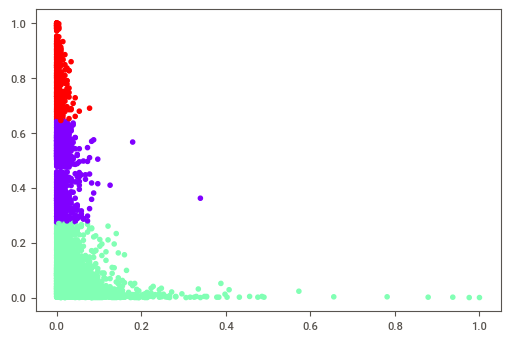

In [42]:
# Finding the final centroids
centroids = model_kmeans.cluster_centers_
# Evaluating the quality of clusters
s = metrics.silhouette_score(X_Vars_Scaled, labels, metric='euclidean')
print(f"Silhouette Coefficient of Kmeans Clusters: {s:.2f}")
# plotting the clusters using two variables:
plt.scatter(X_Vars_Scaled[:, 0], X_Vars_Scaled[:, 1], c=labels, cmap="rainbow")
plt.show()

In [43]:
df_cust['Kmeans_Cluster_ID'] = labels

In [44]:
df_cust

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Kmeans_Cluster_ID
0,12346,-64.68,11,325.0,-5.880000,0
1,12608,415.79,1,404.0,415.790000,0
2,12745,723.85,2,486.0,361.925000,2
3,12746,230.85,3,527.0,76.950000,2
4,12747,9164.59,31,2.0,295.631935,1
...,...,...,...,...,...,...
5405,18283,2736.65,19,3.0,144.034211,1
5406,18284,436.68,2,429.0,218.340000,0
5407,18285,427.00,1,660.0,427.000000,2
5408,18286,1188.43,3,476.0,396.143333,2


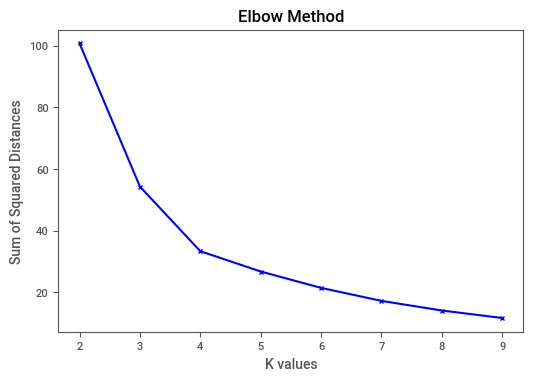

In [45]:
# Finding the optimal K using SSD:
K = range(2,10)
sum_of_squared_distances = []
Silhoutte_Scores =[]
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X_Vars_Scaled)
    s = metrics.silhouette_score(X_Vars_Scaled, model.predict(X_Vars_Scaled), metric='euclidean')
    Silhoutte_Scores.append(s)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

In [46]:
Silhoutte_Scores

[0.7039080310112376,
 0.6577730374846207,
 0.6204974770170424,
 0.590760768834641,
 0.5566016151057728,
 0.550518445864323,
 0.5174590120989446,
 0.4987984285497056]

In [47]:
silh_score_df_KMeans= pd.DataFrame(zip(K,K,Silhoutte_Scores,sum_of_squared_distances), columns = ["K_Values","Number_Of_Clusters","SilhoutteScore","sum_of_squared_distances"])

silh_score_df_KMeans

,K_Values,Number_Of_Clusters,SilhoutteScore,sum_of_squared_distances
0,2,2,0.703908,100.669817
1,3,3,0.657773,54.269705
2,4,4,0.620497,33.334515
3,5,5,0.590761,26.751200
4,6,6,0.556602,21.447331
5,7,7,0.550518,17.229142
6,8,8,0.517459,14.112624
7,9,9,0.498798,11.683970


## Implementing DBSCAN

In [48]:
# Implemting DBSCAN: (Initial Model)
model_dbscan = DBSCAN(eps=0.5, min_samples=10)
model_dbscan.fit(X_Vars_Scaled)
labels_dbscan = model_dbscan.labels_
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(labels_dbscan)

[0 0 0 ... 0 0 0]


In [49]:
print(set(labels_dbscan))

{0}


In [50]:
eps_range = np.arange(0.1,1,0.01)
silhoutte_scores = []
N_Clusters = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for e in eps_range:
    print(e)
    model = DBSCAN(eps=e, min_samples=5).fit(X_Vars_Scaled) 
    nclusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
    try:
        sil_score = metrics.silhouette_score(X_Vars_Scaled, model.labels_)
    except:
        sil_score = 0
        print("An exception occurred")
    N_Clusters.append(nclusters)
    silhoutte_scores.append(sil_score)

0.1
0.11
0.12
0.13
0.13999999999999999
0.14999999999999997
0.15999999999999998
0.16999999999999998
0.17999999999999997
0.18999999999999995
0.19999999999999996
0.20999999999999996
0.21999999999999995
0.22999999999999995
0.23999999999999994
0.24999999999999992
0.2599999999999999
0.2699999999999999
0.2799999999999999
0.2899999999999999
0.29999999999999993
0.30999999999999994
0.3199999999999999
0.32999999999999985
0.33999999999999986
0.34999999999999987
0.3599999999999999
0.3699999999999999
0.3799999999999999
0.3899999999999999
0.3999999999999998
An exception occurred
0.4099999999999998
An exception occurred
0.4199999999999998
An exception occurred
0.4299999999999998
An exception occurred
0.43999999999999984
An exception occurred
0.44999999999999984
An exception occurred
0.45999999999999985
An exception occurred
0.46999999999999986
An exception occurred
0.47999999999999976
An exception occurred
0.48999999999999977
An exception occurred
0.4999999999999998
An exception occurred
0.50999999999

In [51]:
silh_score_df_DBSCAN = pd.DataFrame(zip(eps_range,N_Clusters,silhoutte_scores), columns = ["Eps_Value","Number_Of_Clusters","SilhoutteScore"])

In [52]:
silh_score_df_DBSCAN

,Eps_Value,Number_Of_Clusters,SilhoutteScore
0,0.10,1,0.553983
1,0.11,1,0.553983
2,0.12,1,0.553983
3,0.13,2,0.417510
4,0.14,2,0.417510
...,...,...,...
85,0.95,1,0.000000
86,0.96,1,0.000000
87,0.97,1,0.000000
88,0.98,1,0.000000


In [53]:
silh_score_df_DBSCAN.loc[silh_score_df_DBSCAN['Number_Of_Clusters']==2]

,Eps_Value,Number_Of_Clusters,SilhoutteScore
3,0.13,2,0.417510
4,0.14,2,0.417510
5,0.15,2,0.408073
6,0.16,2,0.401897
7,0.17,2,0.401654
8,0.18,2,0.401654
9,0.19,2,0.401654


In [54]:
# Implemting DBSCAN: (Initial Model)
model_dbscan = DBSCAN(eps=0.13, min_samples=10)
model_dbscan.fit(X_Vars_Scaled)
labels_dbscan = model_dbscan.labels_
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(set(labels_dbscan))

{0, -1}


In [55]:
df_cust['DBSCAN_ClusterId'] = labels_dbscan

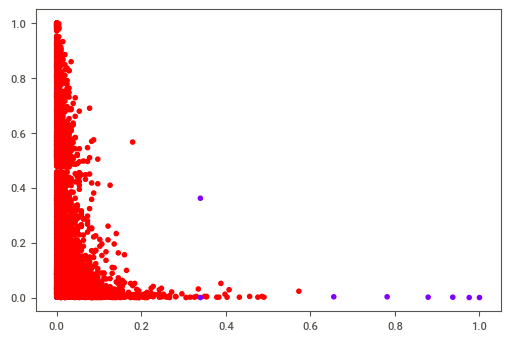

In [56]:
plt.scatter(X_Vars_Scaled[:, 0], X_Vars_Scaled[:, 1], c=labels_dbscan, cmap="rainbow")
plt.show()

## Implemeting tSNE dimensionality reduction

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 5410 samples in 0.004s...
[t-SNE] Computed neighbors for 5410 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5410
[t-SNE] Computed conditional probabilities for sample 2000 / 5410
[t-SNE] Computed conditional probabilities for sample 3000 / 5410
[t-SNE] Computed conditional probabilities for sample 4000 / 5410
[t-SNE] Computed conditional probabilities for sample 5000 / 5410
[t-SNE] Computed conditional probabilities for sample 5410 / 5410
[t-SNE] Mean sigma: 0.007856
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.664902
[t-SNE] KL divergence after 1000 iterations: 0.469853


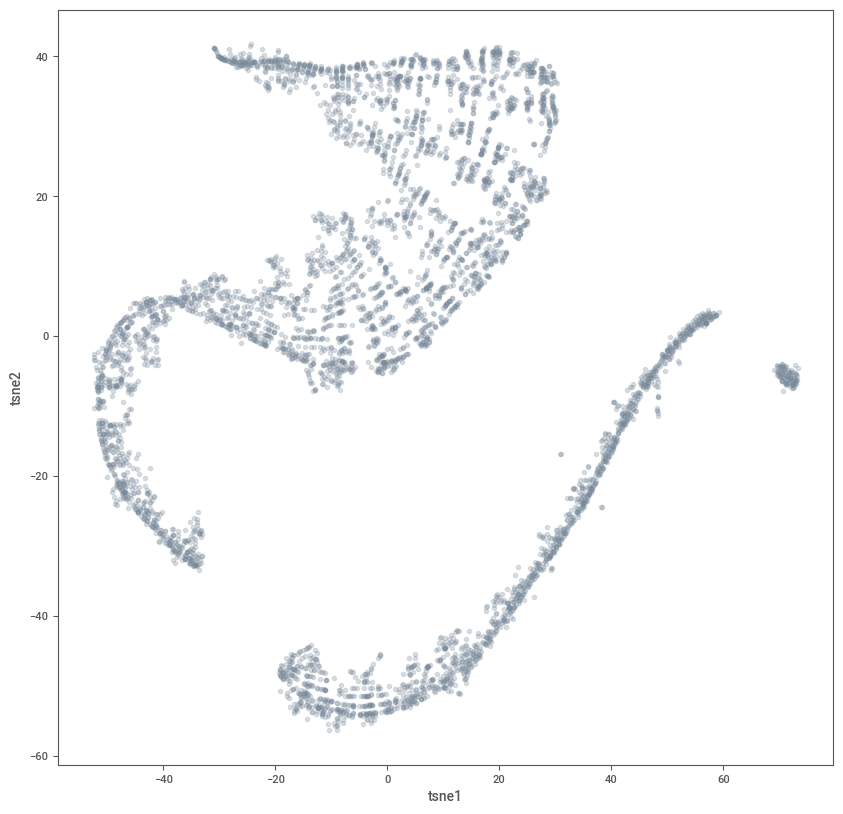

In [57]:
#Bulding TSNIE:

tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=1000, random_state=100)
tsne_scale_results = tsne.fit_transform(X_Vars_Scaled)

tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [58]:
X_Vars_Scaled

array([[0.04854369, 0.4403794 , 0.66938676],
       [0.        , 0.54742547, 0.68062986],
       [0.00485437, 0.65853659, 0.67919364],
       ...,
       [0.        , 0.89430894, 0.68092876],
       [0.00970874, 0.64498645, 0.68010602],
       [0.02912621, 0.05691057, 0.68545728]])

In [59]:
tsne_df_scale

,tsne1,tsne2
0,-33.630482,-28.366625
1,1.832925,-52.180389
2,25.944378,-34.084564
3,32.174927,-26.283703
4,-20.711800,39.391254
...,...,...
5405,-9.201660,38.129120
5406,13.105933,-47.067230
5407,52.904675,-0.576125
5408,23.544041,-35.812492


# Implemeting DBSCAN on tSNIE

In [60]:

eps_range = np.arange(0.1,10,0.1)
silhoutte_scores = []
N_Clusters = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for e in eps_range:
    print(e) 
    model = DBSCAN(eps=e, min_samples=5).fit(tsne_df_scale) 
    nclusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
    try:
        sil_score = metrics.silhouette_score(tsne_df_scale, model.labels_)
    except:
        sil_score = 0
        print("An exception occurred")
    N_Clusters.append(nclusters)
    silhoutte_scores.append(sil_score)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
5.9
6.0
6.1
6.2
6.3
6.4
6.5
6.6
6.7
6.8
6.9
7.0
7.1
7.2
7.3
7.4
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.2
8.3
8.4
8.5
8.6
8.7
8.8
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.700000000000001
9.8
9.9


In [61]:
silh_score_df_DBSCAN_tSNIE = pd.DataFrame(zip(eps_range,N_Clusters,silhoutte_scores), columns = ["Eps_Value","Number_Of_Clusters","SilhoutteScore"])

In [62]:
silh_score_df_DBSCAN_tSNIE

,Eps_Value,Number_Of_Clusters,SilhoutteScore
0,0.1,5,-0.633466
1,0.2,35,-0.814717
2,0.3,112,-0.710938
3,0.4,226,-0.429856
4,0.5,283,-0.150030
...,...,...,...
94,9.5,3,0.381410
95,9.6,3,0.381410
96,9.7,3,0.381410
97,9.8,3,0.381410


In [63]:
silh_score_df_DBSCAN_tSNIE['SilhoutteScore'].max()

0.38140976428985596

In [64]:
tsne_df = tsne_df_scale.copy()

In [65]:
# Implemting DBSCAN: (Initial Model)
model_dbscan = DBSCAN(eps=5, min_samples=10)
model_dbscan.fit(tsne_df_scale)
labels_dbscan = model_dbscan.labels_

set(labels_dbscan)

tsne_df['DBSCAN_tSNE_cluster_ID'] =labels_dbscan

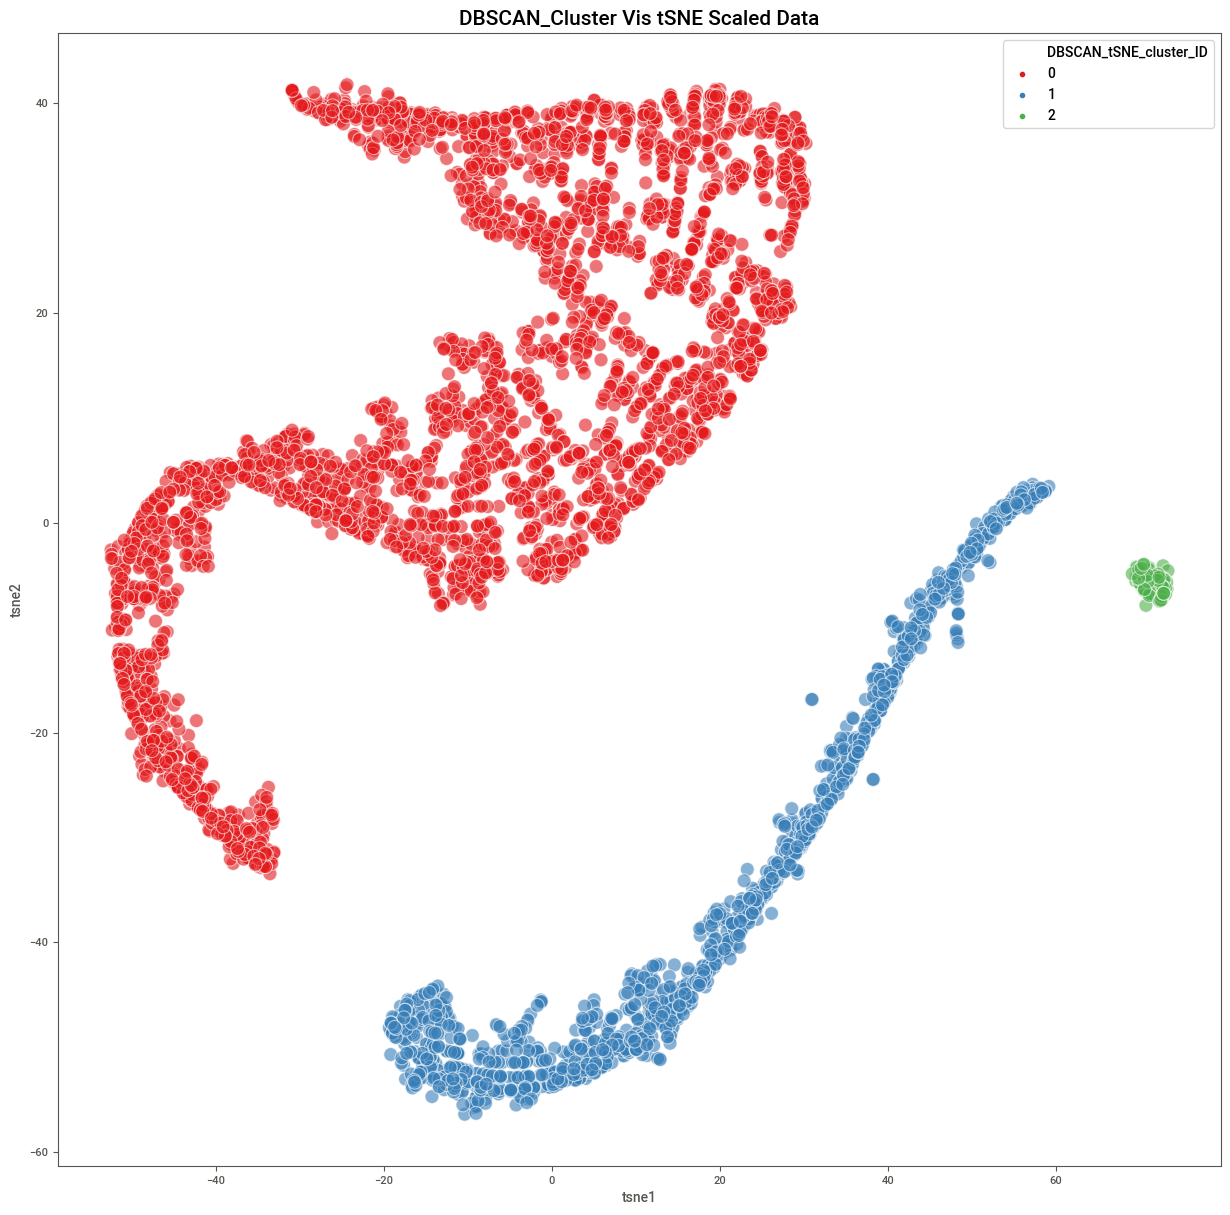

In [66]:
plt.figure(figsize = (15,15))
sns.scatterplot(tsne_df.iloc[:,0],tsne_df.iloc[:,1],hue=tsne_df['DBSCAN_tSNE_cluster_ID'], palette='Set1', s=100, alpha=0.6).set_title('DBSCAN_Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

# Implemeting KMEANS on tSNIE

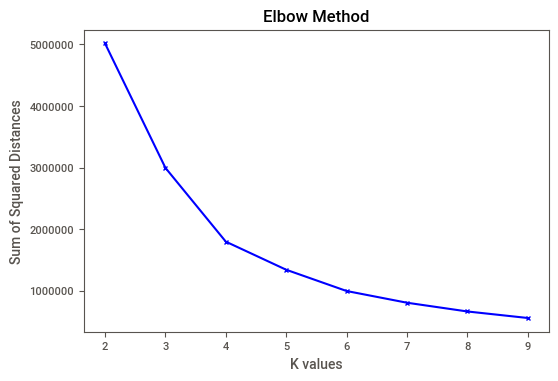

,K_Values,Number_Of_Clusters,SilhoutteScore
0,2,2,0.391879
1,3,3,0.455795
2,4,4,0.507900
3,5,5,0.479448
4,6,6,0.507113
5,7,7,0.499633
6,8,8,0.492755
7,9,9,0.481812


In [67]:
# Finding the optimal K using SSD:
K = range(2,10)
sum_of_squared_distances = []
Silhoutte_Scores =[]
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k, random_state=100).fit(tsne_df_scale)
    s = metrics.silhouette_score(tsne_df_scale, model.predict(tsne_df_scale), metric='euclidean')
    Silhoutte_Scores.append(s)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

silh_score_df_KMeans= pd.DataFrame(zip(K,K,Silhoutte_Scores), columns = ["K_Values","Number_Of_Clusters","SilhoutteScore"])

silh_score_df_KMeans

In [70]:
# Implementing Kmeans Algorithm:
# Creating the KMeans object and fitting
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(tsne_df_scale)
# Predicting the cluster labels
labels_kmeans_tsnie = model_kmeans.predict(tsne_df_scale)
print(labels_kmeans_tsnie)
tsne_df['KMEANS_tSNE_cluster_ID'] =labels_kmeans_tsnie

[2 1 1 ... 1 1 0]


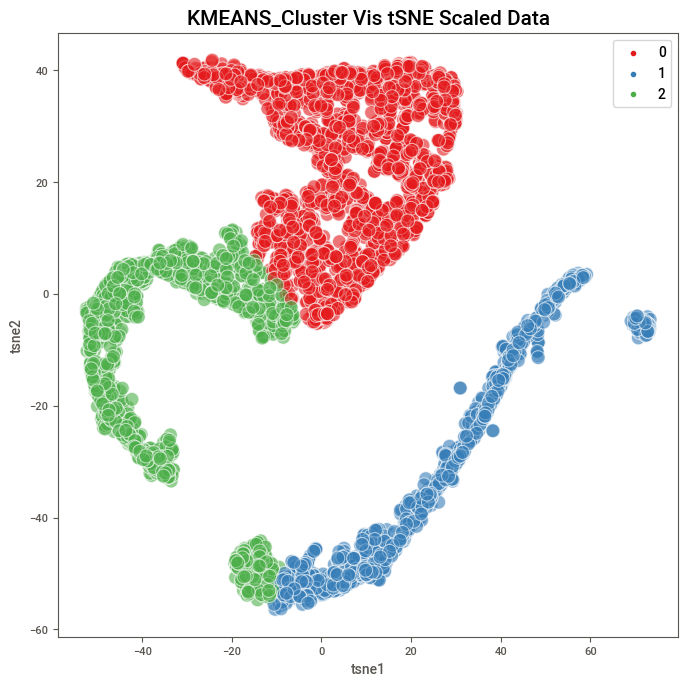

In [71]:
plt.figure(figsize = (8,8))
sns.scatterplot(tsne_df.iloc[:,0],tsne_df.iloc[:,1],hue=labels_kmeans_tsnie, palette='Set1', s=100, alpha=0.6).set_title('KMEANS_Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [72]:
tsne_df

,tsne1,tsne2,DBSCAN_tSNE_cluster_ID,KMEANS_tSNE_cluster_ID
0,-33.630482,-28.366625,0,2
1,1.832925,-52.180389,1,1
2,25.944378,-34.084564,1,1
3,32.174927,-26.283703,1,1
4,-20.711800,39.391254,0,0
...,...,...,...,...
5405,-9.201660,38.129120,0,0
5406,13.105933,-47.067230,1,1
5407,52.904675,-0.576125,1,1
5408,23.544041,-35.812492,1,1


In [73]:
df_cust[['DBSCAN_tSNE_cluster_ID','KMEANS_tSNE_cluster_ID']] = tsne_df[['DBSCAN_tSNE_cluster_ID','KMEANS_tSNE_cluster_ID']]

In [74]:
df_cust

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Kmeans_Cluster_ID,DBSCAN_ClusterId,DBSCAN_tSNE_cluster_ID,KMEANS_tSNE_cluster_ID
0,12346,-64.68,11,325.0,-5.880000,0,0,0,2
1,12608,415.79,1,404.0,415.790000,0,0,1,1
2,12745,723.85,2,486.0,361.925000,2,0,1,1
3,12746,230.85,3,527.0,76.950000,2,0,1,1
4,12747,9164.59,31,2.0,295.631935,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5405,18283,2736.65,19,3.0,144.034211,1,0,0,0
5406,18284,436.68,2,429.0,218.340000,0,0,1,1
5407,18285,427.00,1,660.0,427.000000,2,0,1,1
5408,18286,1188.43,3,476.0,396.143333,2,0,1,1


# Inference of clusters:

In [75]:
df_cust.columns

Index(['Customer ID', 'Revenue', 'Frequency', 'Recency', 'Average_Ticket_Size',
       'Kmeans_Cluster_ID', 'DBSCAN_ClusterId', 'DBSCAN_tSNE_cluster_ID',
       'KMEANS_tSNE_cluster_ID'],
      dtype='object')

In [76]:
X_train = df_cust[['Frequency', 'Recency', 'Average_Ticket_Size']]
y_train = df_cust['DBSCAN_tSNE_cluster_ID']

In [81]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clst_clf=RandomForestClassifier(n_estimators=100, random_state=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clst_clf.fit(X_train,y_train)

y_pred=rf_clst_clf.predict(X_train)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


In [79]:
# Checking the if the predictions are equal to the original
sum(y_train==y_pred) == X_train.shape[0]

True

In [83]:
Importance = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf_clst_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [84]:
Importance

,feature,importance
1,Recency,0.890299
0,Frequency,0.080678
2,Average_Ticket_Size,0.029023


In [85]:
df_cust_feature_diff = df_cust.groupby(['DBSCAN_tSNE_cluster_ID']).agg({'Recency':'mean', 'Frequency':'mean', 'Average_Ticket_Size':'mean'}).reset_index(drop=False)

In [86]:
df_cust_feature_diff

,DBSCAN_tSNE_cluster_ID,Recency,Frequency,Average_Ticket_Size
0,0,83.115515,8.185137,332.011684
1,1,484.554429,2.301555,229.031073
2,2,729.645833,1.041667,190.496927


In [87]:
df_cust['DBSCAN_tSNE_cluster_ID'].value_counts()

0    3835
1    1479
2      96
Name: DBSCAN_tSNE_cluster_ID, dtype: int64

In [89]:
df_cust['DBSCAN_tSNE_cluster_ID'].value_counts(normalize = True)

0    0.708872
1    0.273383
2    0.017745
Name: DBSCAN_tSNE_cluster_ID, dtype: float64

In [90]:
# Feature weights: Recency = 30%,Frequency = 60%, Average_Ticket_size = 10%
X_Vars_Scaled_weighted = X_Vars_Scaled.copy()
X_Vars_Scaled_weighted[:,0] = X_Vars_Scaled_weighted[:,0] * 0.30
X_Vars_Scaled_weighted[:,1] = X_Vars_Scaled_weighted[:,1] * 0.60
X_Vars_Scaled_weighted[:,2] = X_Vars_Scaled_weighted[:,2] * 0.10

In [91]:
X_Vars_Scaled

array([[0.04854369, 0.4403794 , 0.66938676],
       [0.        , 0.54742547, 0.68062986],
       [0.00485437, 0.65853659, 0.67919364],
       ...,
       [0.        , 0.89430894, 0.68092876],
       [0.00970874, 0.64498645, 0.68010602],
       [0.02912621, 0.05691057, 0.68545728]])

In [92]:
X_Vars_Scaled_weighted

array([[0.01456311, 0.26422764, 0.06693868],
       [0.        , 0.32845528, 0.06806299],
       [0.00145631, 0.39512195, 0.06791936],
       ...,
       [0.        , 0.53658537, 0.06809288],
       [0.00291262, 0.38699187, 0.0680106 ],
       [0.00873786, 0.03414634, 0.06854573]])

In [93]:
# Sample Weights
sample_weights = np.random.rand(df_cust.shape[0])
# model = DBSCAN(eps=e, min_samples=5, sample_weight= []).fit(tsne_df_scale)

In [94]:
sample_weights

array([0.80682896, 0.38794019, 0.86609942, ..., 0.84915203, 0.41337936,
       0.21815993])

In [95]:
df_cust

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Kmeans_Cluster_ID,DBSCAN_ClusterId,DBSCAN_tSNE_cluster_ID,KMEANS_tSNE_cluster_ID
0,12346,-64.68,11,325.0,-5.880000,0,0,0,2
1,12608,415.79,1,404.0,415.790000,0,0,1,1
2,12745,723.85,2,486.0,361.925000,2,0,1,1
3,12746,230.85,3,527.0,76.950000,2,0,1,1
4,12747,9164.59,31,2.0,295.631935,1,0,0,0
...,...,...,...,...,...,...,...,...,...
5405,18283,2736.65,19,3.0,144.034211,1,0,0,0
5406,18284,436.68,2,429.0,218.340000,0,0,1,1
5407,18285,427.00,1,660.0,427.000000,2,0,1,1
5408,18286,1188.43,3,476.0,396.143333,2,0,1,1


In [96]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

# Churn Indicator

In [97]:
df_churn = pd.read_csv("Churn_Indicator.csv", dtype=str)

df_cust = df_cust.merge(df_churn, how='left', on = ['Customer ID'])

df_cust['Final_Churn_Ind'].fillna('False', inplace=True)

In [98]:
df_cust['Churn_Ind'] = df_cust['Final_Churn_Ind']=='True'

In [99]:
df_cust.drop(columns = ['Final_Churn_Ind'], inplace= True)

In [100]:
df_cust

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Kmeans_Cluster_ID,DBSCAN_ClusterId,DBSCAN_tSNE_cluster_ID,KMEANS_tSNE_cluster_ID,Churn_Ind
0,12346,-64.68,11,325.0,-5.880000,0,0,0,2,False
1,12608,415.79,1,404.0,415.790000,0,0,1,1,False
2,12745,723.85,2,486.0,361.925000,2,0,1,1,False
3,12746,230.85,3,527.0,76.950000,2,0,1,1,True
4,12747,9164.59,31,2.0,295.631935,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...
5405,18283,2736.65,19,3.0,144.034211,1,0,0,0,False
5406,18284,436.68,2,429.0,218.340000,0,0,1,1,False
5407,18285,427.00,1,660.0,427.000000,2,0,1,1,False
5408,18286,1188.43,3,476.0,396.143333,2,0,1,1,False


In [101]:
Cluster_churn_stat = df_cust.groupby(['DBSCAN_tSNE_cluster_ID']).agg({'Customer ID':'count','Churn_Ind':'sum'}).reset_index(drop=False)

In [102]:
Cluster_churn_stat['pct_churn'] = Cluster_churn_stat['Churn_Ind'] / Cluster_churn_stat['Customer ID']

In [103]:
Cluster_churn_stat

,DBSCAN_tSNE_cluster_ID,Customer ID,Churn_Ind,pct_churn
0,0,3835,737.0,0.192177
1,1,1479,379.0,0.256254
2,2,96,0.0,0.000000


# Churn Modeling:

In [104]:
## Data Preprocessing:

In [105]:
df_cust.set_index(['Customer ID'],inplace=True)

In [106]:
df_cust

,Revenue,Frequency,Recency,Average_Ticket_Size,Kmeans_Cluster_ID,DBSCAN_ClusterId,DBSCAN_tSNE_cluster_ID,KMEANS_tSNE_cluster_ID,Churn_Ind
Customer ID,,,,,,,,,
12346,-64.68,11,325.0,-5.880000,0,0,0,2,False
12608,415.79,1,404.0,415.790000,0,0,1,1,False
12745,723.85,2,486.0,361.925000,2,0,1,1,False
12746,230.85,3,527.0,76.950000,2,0,1,1,True
12747,9164.59,31,2.0,295.631935,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...
18283,2736.65,19,3.0,144.034211,1,0,0,0,False
18284,436.68,2,429.0,218.340000,0,0,1,1,False
18285,427.00,1,660.0,427.000000,2,0,1,1,False


In [107]:
X_Data = df_cust[['Frequency', 'Recency', 'Average_Ticket_Size', 'DBSCAN_tSNE_cluster_ID']]
y_Data = df_cust['Churn_Ind']

In [108]:
X_Data

,Frequency,Recency,Average_Ticket_Size,DBSCAN_tSNE_cluster_ID
Customer ID,,,,
12346,11,325.0,-5.880000,0
12608,1,404.0,415.790000,1
12745,2,486.0,361.925000,1
12746,3,527.0,76.950000,1
12747,31,2.0,295.631935,0
...,...,...,...,...
18283,19,3.0,144.034211,0
18284,2,429.0,218.340000,1
18285,1,660.0,427.000000,1


In [109]:
y_Data

Customer ID
12346    False
12608    False
12745    False
12746     True
12747    False
         ...  
18283    False
18284    False
18285    False
18286    False
18287    False
Name: Churn_Ind, Length: 5410, dtype: bool

### Onehot Encoding: (For creating dummy binary variables for categorical variables)

In [110]:
df_clust_dummy = pd.get_dummies(X_Data['DBSCAN_tSNE_cluster_ID'], prefix='Cluster')
X_Data[list(df_clust_dummy.columns)] = df_clust_dummy

C:\Users\Vamsee\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [111]:
X_Data.columns

Index(['Frequency', 'Recency', 'Average_Ticket_Size', 'DBSCAN_tSNE_cluster_ID',
       'Cluster_0', 'Cluster_1', 'Cluster_2'],
      dtype='object')

In [112]:
X_Data.drop(columns = ['DBSCAN_tSNE_cluster_ID'], inplace=True)

C:\Users\Vamsee\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [113]:
X_Data

,Frequency,Recency,Average_Ticket_Size,Cluster_0,Cluster_1,Cluster_2
Customer ID,,,,,,
12346,11,325.0,-5.880000,1,0,0
12608,1,404.0,415.790000,0,1,0
12745,2,486.0,361.925000,0,1,0
12746,3,527.0,76.950000,0,1,0
12747,31,2.0,295.631935,1,0,0
...,...,...,...,...,...,...
18283,19,3.0,144.034211,1,0,0
18284,2,429.0,218.340000,0,1,0
18285,1,660.0,427.000000,0,1,0


In [114]:
# For coverting string categories into numerical mapping:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(X_Data['DBSCAN_tSNE_cluster_ID'])
# le.transform(X_Data['DBSCAN_tSNE_cluster_ID'])
# le.inverse_transform(X_Data['DBSCAN_tSNE_cluster_ID'])

### Train Test Split

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_Data, y_Data, test_size=0.30, random_state=100)

In [116]:
print(X_Data.shape)
print(X_train.shape)
print(X_test.shape)

(5410, 6)
(3787, 6)
(1623, 6)


In [117]:
# pct of train counts:
print(y_train.value_counts())
y_train.value_counts(normalize =True)

False    3003
True      784
Name: Churn_Ind, dtype: int64


False    0.792976
True     0.207024
Name: Churn_Ind, dtype: float64

In [118]:
X = X_train
y = y_train

In [119]:
X_train.shape

(3787, 6)

# Model Training:

In [ ]:
# Logistic Regression:

In [121]:
from sklearn.linear_model import LogisticRegression
model_clf_logistic = LogisticRegression(random_state=0,solver='lbfgs').fit(X, y)

# Prediction on ths test Data:
y_predicted = model_clf_logistic.predict(X_test)

y_pred_probs = model_clf_logistic.predict_proba(X_test)
model_accuracy = model_clf_logistic.score(X_test, y_test)
print(model_accuracy)

0.7997535428219347


In [122]:
# Reporting Metrices
from sklearn.metrics import confusion_matrix,classification_report, precision_score, recall_score
# actual values
actual = y_test
# predicted values
predicted = y_predicted

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
df_cfmatrix = pd.DataFrame(matrix, index=[1,0], columns=[1,0] )
print('Confusion matrix : \n',df_cfmatrix,'\n')

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)

tp_outcome_ser = pd.Series([tp, fn, fp, tn], index=['tp', 'fn', 'fp', 'tn'])
print('Outcome values : \n',tp_outcome_ser,'\n')

# Recall and Precision metrics
recall = recall_score(actual,predicted)
precision = precision_score(actual,predicted)
print('Recall : \n',recall,'\n')
print('Precision: \n',precision,'\n')

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
     1     0
1  22   310
0  15  1276 

Outcome values : 
 tp      22
fn     310
fp      15
tn    1276
dtype: int64 

Recall : 
 0.06626506024096386 

Precision: 
 0.5945945945945946 

Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.07      0.12       332
           0       0.80      0.99      0.89      1291

    accuracy                           0.80      1623
   macro avg       0.70      0.53      0.50      1623
weighted avg       0.76      0.80      0.73      1623



In [123]:
def give_classifcation_metrics(actual, predicted):

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0])
    df_cfmatrix = pd.DataFrame(matrix, index=[1,0], columns=[1,0] )
    print('Confusion matrix : \n',df_cfmatrix,'\n')

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)

    tp_outcome_ser = pd.Series([tp, fn, fp, tn], index=['tp', 'fn', 'fp', 'tn'])
    print('Outcome values : \n',tp_outcome_ser,'\n')

    # Recall and Precision metrics
    recall = recall_score(actual,predicted)
    precision = precision_score(actual,predicted)
    print('Recall : \n',recall,'\n')
    print('Precision: \n',precision,'\n')

    # classification report for precision, recall f1-score and accuracy
    clf_report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n',clf_report)
    
    return(df_cfmatrix,tp_outcome_ser,recall,precision, clf_report)

In [124]:
logist_reg_output = give_classifcation_metrics(y_test,y_predicted)

Confusion matrix : 
     1     0
1  22   310
0  15  1276 

Outcome values : 
 tp      22
fn     310
fp      15
tn    1276
dtype: int64 

Recall : 
 0.06626506024096386 

Precision: 
 0.5945945945945946 

Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.07      0.12       332
           0       0.80      0.99      0.89      1291

    accuracy                           0.80      1623
   macro avg       0.70      0.53      0.50      1623
weighted avg       0.76      0.80      0.73      1623



### Balancing the imbalance class with SMOTE:

In [125]:
# pip install imblearn
#Balancing the class with SMOTE:
from imblearn.over_sampling import SMOTE

In [127]:
smt = SMOTE(sampling_strategy= 0.6, random_state = 100, k_neighbors = 5)
xtrain_smt, ytrain_smt = smt.fit_resample(X_train, y_train)

In [128]:
xtrain_smt

,Frequency,Recency,Average_Ticket_Size,Cluster_0,Cluster_1,Cluster_2
0,1,642.000000,635.900000,0,1,0
1,1,194.000000,207.150000,1,0,0
2,2,472.000000,89.325000,0,1,0
3,2,410.000000,155.275000,0,1,0
4,6,9.000000,375.918333,1,0,0
...,...,...,...,...,...,...
4799,11,59.303137,260.662815,1,0,0
4800,2,313.778218,21.805852,1,0,0
4801,3,530.780174,170.827501,0,1,0
4802,6,133.689848,380.799031,1,0,0


In [129]:
ytrain_smt.value_counts(normalize =True)

False    0.625104
True     0.374896
Name: Churn_Ind, dtype: float64

### Model Training on balanced Data

In [130]:
X = xtrain_smt
y = ytrain_smt

In [131]:
# 1. Logistic Regression
model_clf_logistic = LogisticRegression(random_state=0,solver='lbfgs').fit(X, y)

# Predictions on the test data:
y_predicted_logistic = model_clf_logistic.predict(X_test)
y_pred_probs = model_clf_logistic.predict_proba(X_test)
model_accuracy = model_clf_logistic.score(X_test, y_test)
print(model_accuracy)

0.800369685767098


C:\Users\Vamsee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
logist_reg_output = give_classifcation_metrics(y_test,y_predicted_logistic)

Confusion matrix : 
     1     0
1  95   237
0  87  1204 

Outcome values : 
 tp      95
fn     237
fp      87
tn    1204
dtype: int64 

Recall : 
 0.286144578313253 

Precision: 
 0.521978021978022 

Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.29      0.37       332
           0       0.84      0.93      0.88      1291

    accuracy                           0.80      1623
   macro avg       0.68      0.61      0.63      1623
weighted avg       0.77      0.80      0.78      1623



In [133]:
# 2. Random Forest Model:
model_rf_clf=RandomForestClassifier(n_estimators=100, random_state=100).fit(X, y)

# Predictions on the test data:
y_predicted_rf = model_rf_clf.predict(X_test)
y_pred_probs = model_rf_clf.predict_proba(X_test)
model_accuracy = model_rf_clf.score(X_test, y_test)
print(model_accuracy)
RF_clf_output = give_classifcation_metrics(y_test,y_predicted_rf)

0.7621688231669748
Confusion matrix : 
      1     0
1  152   180
0  206  1085 

Outcome values : 
 tp     152
fn     180
fp     206
tn    1085
dtype: int64 

Recall : 
 0.4578313253012048 

Precision: 
 0.4245810055865922 

Classification report : 
               precision    recall  f1-score   support

           1       0.42      0.46      0.44       332
           0       0.86      0.84      0.85      1291

    accuracy                           0.76      1623
   macro avg       0.64      0.65      0.64      1623
weighted avg       0.77      0.76      0.77      1623



In [134]:
y_predicted_rf

array([False,  True, False, ..., False, False, False])

In [135]:
y_pred_probs

array([[1.  , 0.  ],
       [0.48, 0.52],
       [0.89, 0.11],
       ...,
       [0.97, 0.03],
       [0.87, 0.13],
       [0.99, 0.01]])

In [136]:
# 3. XGB Model:
# pip install xgboost
from xgboost import XGBClassifier

model_xgb_clf=XGBClassifier(n_estimators=100, random_state=100).fit(X, y)
# Predictions on the test data:
y_predicted_xgb = model_xgb_clf.predict(X_test)
y_pred_probs = model_xgb_clf.predict_proba(X_test)
model_accuracy = model_xgb_clf.score(X_test, y_test)
print(model_accuracy)
XGBclf_output = give_classifcation_metrics(y_test,y_predicted_xgb)

0.7732593961799138
Confusion matrix : 
      1     0
1  148   184
0  184  1107 

Outcome values : 
 tp     148
fn     184
fp     184
tn    1107
dtype: int64 

Recall : 
 0.4457831325301205 

Precision: 
 0.4457831325301205 

Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.45      0.45       332
           0       0.86      0.86      0.86      1291

    accuracy                           0.77      1623
   macro avg       0.65      0.65      0.65      1623
weighted avg       0.77      0.77      0.77      1623



In [137]:
# 4. GBM Model:
# pip install lightgbm
from lightgbm import LGBMClassifier
model_lgbm_clf = LGBMClassifier(n_estimators=1000, random_state=100).fit(X, y)
# Predictions on the test data:
y_predicted_lgbm = model_lgbm_clf.predict(X_test)
y_pred_probs = model_lgbm_clf.predict_proba(X_test)
model_accuracy = model_lgbm_clf.score(X_test, y_test)
print(model_accuracy)
LGBMcf_output = give_classifcation_metrics(y_test,y_predicted_lgbm)

0.7529266789895256
Confusion matrix : 
      1     0
1  156   176
0  225  1066 

Outcome values : 
 tp     156
fn     176
fp     225
tn    1066
dtype: int64 

Recall : 
 0.46987951807228917 

Precision: 
 0.4094488188976378 

Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.47      0.44       332
           0       0.86      0.83      0.84      1291

    accuracy                           0.75      1623
   macro avg       0.63      0.65      0.64      1623
weighted avg       0.77      0.75      0.76      1623



In [138]:
# 5. CatBoost Model:

# pip install catboost
from catboost import CatBoostClassifier

model_catb_clf = CatBoostClassifier(n_estimators=100, random_state=100).fit(X, y)
# Predictions on the test data:
y_predicted_catb = model_catb_clf.predict(X_test)
y_pred_probs = model_catb_clf.predict_proba(X_test)
print(model_accuracy)
CATBclf_output = give_classifcation_metrics(y_test,y_predicted_catb=='True')

Learning rate set to 0.166333
0:	learn: 0.6592991	total: 146ms	remaining: 14.5s
1:	learn: 0.6366653	total: 148ms	remaining: 7.24s
2:	learn: 0.6172077	total: 149ms	remaining: 4.83s
3:	learn: 0.6010764	total: 151ms	remaining: 3.62s
4:	learn: 0.5897107	total: 152ms	remaining: 2.89s
5:	learn: 0.5795931	total: 154ms	remaining: 2.41s
6:	learn: 0.5702428	total: 155ms	remaining: 2.06s
7:	learn: 0.5619569	total: 157ms	remaining: 1.8s
8:	learn: 0.5565797	total: 159ms	remaining: 1.6s
9:	learn: 0.5505565	total: 161ms	remaining: 1.44s
10:	learn: 0.5458555	total: 162ms	remaining: 1.31s
11:	learn: 0.5428680	total: 164ms	remaining: 1.2s
12:	learn: 0.5386297	total: 165ms	remaining: 1.1s
13:	learn: 0.5364410	total: 167ms	remaining: 1.02s
14:	learn: 0.5334046	total: 169ms	remaining: 955ms
15:	learn: 0.5303193	total: 170ms	remaining: 894ms
16:	learn: 0.5294963	total: 172ms	remaining: 841ms
17:	learn: 0.5283581	total: 174ms	remaining: 792ms
18:	learn: 0.5260575	total: 176ms	remaining: 749ms
19:	learn: 0.52

In [139]:
# 6. Support Vector Machines Classification :
from sklearn import svm 
model_svm_clf = svm.SVC(probability=True,C=1.0, kernel='rbf', degree=2).fit(X, y)
# Predictions on the test data:
y_predicted_svm = model_svm_clf.predict(X_test)
y_pred_probs = model_svm_clf.predict_proba(X_test)
print(model_accuracy)
SVMclf_output = give_classifcation_metrics(y_test,y_predicted_svm)

0.7529266789895256
Confusion matrix : 
     1     0
1  42   290
0  49  1242 

Outcome values : 
 tp      42
fn     290
fp      49
tn    1242
dtype: int64 

Recall : 
 0.12650602409638553 

Precision: 
 0.46153846153846156 

Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.13      0.20       332
           0       0.81      0.96      0.88      1291

    accuracy                           0.79      1623
   macro avg       0.64      0.54      0.54      1623
weighted avg       0.74      0.79      0.74      1623



In [140]:
# Consolidated Output of all algorithms:
pd.DataFrame(zip(['Logistic','RandomForest','XGB', 'LightGBM', 'CatBoost','SVM'],[logist_reg_output[2],RF_clf_output[2],XGBclf_output[2],LGBMcf_output[2], CATBclf_output[2], SVMclf_output[2]]),
                 columns = ['Algorithm','Recall'])

,Algorithm,Recall
0,Logistic,0.286145
1,RandomForest,0.457831
2,XGB,0.445783
3,LightGBM,0.469880
4,CatBoost,0.448795
5,SVM,0.126506


## Hyper Parameter Tuning on each algorithm:

In [141]:
# Hyper Parameter Tuning on each algorithm: OPTIMIZING THE RANDOM FOREST or AnALGORITHM's PERFOMANCE:
search_param_space = {'bootstrap': [True, False],
                 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = model_rf_clf, param_distributions = search_param_space, n_iter = 50,  random_state=42)
rf_random.fit(X, y)

rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

### Predicting the probability of churn on new customers and preparing Target list of customers:

In [142]:
# Shortlisting of Target list of churners on new customer base:
df_x_new_cust = pd.read_csv("df_new_customers_RFM.csv")

In [143]:
df_x_new_cust.set_index("Customer ID", inplace=True)

In [ ]:
df_x_new_cust

### Predicting cluster id of new customers:

In [144]:
# Predicting the potential cluster using the classification model built while inferencing the clusters:
df_x_new_cust['cluster_id_predicted'] = rf_clst_clf.predict(df_x_new_cust[['Frequency', 'Recency', 'Average_Ticket_Size']])

In [145]:
df_x_new_cust

,Revenue,Frequency,Recency,Average_Ticket_Size,cluster_id_predicted
Customer ID,,,,,
17864,924.32,5,12.0,184.864000,0
14308,-849.45,1,549.0,-849.450000,1
13306,53.65,1,430.0,53.650000,1
13563,777.53,2,84.0,388.765000,0
15424,597.78,2,254.0,298.890000,0
...,...,...,...,...,...
13951,674.45,3,176.0,224.816667,0
14732,5447.52,22,8.0,247.614545,0
14196,335.52,1,106.0,335.520000,0


In [146]:
df_x_new_cust_dummy = pd.get_dummies(df_x_new_cust['cluster_id_predicted'], prefix='Cluster')
df_x_new_cust[list(df_x_new_cust_dummy.columns)] = df_x_new_cust_dummy

In [147]:
df_x_new_cust.drop(columns = ['cluster_id_predicted'], inplace=True)

In [148]:
df_x_new_cust.dtypes

Revenue                float64
Frequency                int64
Recency                float64
Average_Ticket_Size    float64
Cluster_0                uint8
Cluster_1                uint8
Cluster_2                uint8
dtype: object

In [149]:
df_x_new_cust

,Revenue,Frequency,Recency,Average_Ticket_Size,Cluster_0,Cluster_1,Cluster_2
Customer ID,,,,,,,
17864,924.32,5,12.0,184.864000,1,0,0
14308,-849.45,1,549.0,-849.450000,0,1,0
13306,53.65,1,430.0,53.650000,0,1,0
13563,777.53,2,84.0,388.765000,1,0,0
15424,597.78,2,254.0,298.890000,1,0,0
...,...,...,...,...,...,...,...
13951,674.45,3,176.0,224.816667,1,0,0
14732,5447.52,22,8.0,247.614545,1,0,0
14196,335.52,1,106.0,335.520000,1,0,0


### Predicting the probability of churn using the best algo trained:

In [150]:
probs =  model_lgbm_clf.predict_proba(df_x_new_cust[['Frequency', 'Recency', 'Average_Ticket_Size', 'Cluster_0','Cluster_1', 'Cluster_2']])

In [151]:
df_x_new_cust['prob_churn'] = probs[:,1]

In [152]:
df_x_new_cust = df_x_new_cust.reset_index(drop=False)

In [153]:
df_x_new_cust

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Cluster_0,Cluster_1,Cluster_2,prob_churn
0,17864,924.32,5,12.0,184.864000,1,0,0,0.015905
1,14308,-849.45,1,549.0,-849.450000,0,1,0,0.138989
2,13306,53.65,1,430.0,53.650000,0,1,0,0.157513
3,13563,777.53,2,84.0,388.765000,1,0,0,0.010828
4,15424,597.78,2,254.0,298.890000,1,0,0,0.095994
...,...,...,...,...,...,...,...,...,...
536,13951,674.45,3,176.0,224.816667,1,0,0,0.103733
537,14732,5447.52,22,8.0,247.614545,1,0,0,0.073813
538,14196,335.52,1,106.0,335.520000,1,0,0,0.000009
539,14590,2884.29,19,424.0,151.804737,0,1,0,0.999904


In [154]:
df_x_new_cust.sort_values(['prob_churn','Average_Ticket_Size'], ascending = False)

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Cluster_0,Cluster_1,Cluster_2,prob_churn
110,16754,56560.58,21,372.0,2693.360952,0,1,0,1.000000e+00
484,14134,11123.35,11,382.0,1011.213636,0,1,0,1.000000e+00
293,15934,2190.66,2,417.0,1095.330000,0,1,0,9.999958e-01
148,13715,8438.34,19,281.0,444.123158,1,0,0,9.999791e-01
450,13958,4402.33,9,372.0,489.147778,0,1,0,9.999710e-01
...,...,...,...,...,...,...,...,...,...
540,17357,388.14,1,24.0,388.140000,1,0,0,1.003000e-06
267,18005,249.72,2,3.0,124.860000,1,0,0,8.354501e-07
442,12824,397.12,1,59.0,397.120000,1,0,0,6.620221e-07
159,13188,114.60,1,11.0,114.600000,1,0,0,4.293212e-07


In [155]:
top_10_churners = df_x_new_cust.sort_values(['prob_churn','Average_Ticket_Size'], ascending = False).head(10)

In [156]:
top_10_churners

,Customer ID,Revenue,Frequency,Recency,Average_Ticket_Size,Cluster_0,Cluster_1,Cluster_2,prob_churn
110,16754,56560.58,21,372.0,2693.360952,0,1,0,1.000000
484,14134,11123.35,11,382.0,1011.213636,0,1,0,1.000000
293,15934,2190.66,2,417.0,1095.330000,0,1,0,0.999996
148,13715,8438.34,19,281.0,444.123158,1,0,0,0.999979
450,13958,4402.33,9,372.0,489.147778,0,1,0,0.999971
505,17139,19491.61,22,15.0,885.982273,1,0,0,0.999961
107,13174,9494.84,11,16.0,863.167273,1,0,0,0.999953
539,14590,2884.29,19,424.0,151.804737,0,1,0,0.999904
533,15736,1717.27,2,430.0,858.635000,0,1,0,0.999882
79,13615,6212.23,12,312.0,517.685833,1,0,0,0.999831


In [157]:
top_10_churners['Customer ID']

110    16754
484    14134
293    15934
148    13715
450    13958
505    17139
107    13174
539    14590
533    15736
79     13615
Name: Customer ID, dtype: int64

(array([335.,  55.,  23.,  14.,  11.,   8.,  10.,  10.,  19.,  56.]),
 array([2.29697154e-07, 1.00000205e-01, 2.00000181e-01, 3.00000156e-01,
        4.00000132e-01, 5.00000107e-01, 6.00000083e-01, 7.00000058e-01,
        8.00000034e-01, 9.00000009e-01, 9.99999985e-01]),
 <a list of 10 Patch objects>)

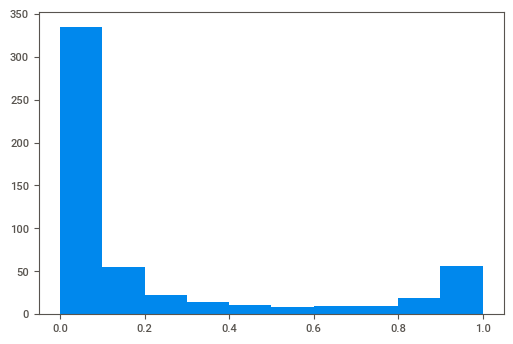

In [158]:
# Decile view for shortlisting the top 2 deciles for churners:
plt.hist(df_x_new_cust['prob_churn'], bins = 10)

# Assignment: (Individual Assignment)
- Rerun the exercise using the PCA (using first two principal components) instead of tSNIE as dimensionality reduction technique
- Optimize the performance of RF, XGB, lightGBM using Grid Search Cross Validation (using the similar search space defined above for random forest)

### Submit PDF file consisting the below:
- Plots of Kmeans and DBSCAN clusters on two Principal components?
- Whats the the impact of changing the kernel of the SVM on the SVM performance?
- Is there any improvement on the recall you have seen on each algorithm of RF, XGB, lightGBM because of hyper parameter tuning?
- Is there any improvement on the recall on the best accuracy across all algorithms
- Compare the order of feature importance across all the algorithms and mention about the differences being observed

### Submission Cutoff time: 12th April 2021 (11:59PM)

### Quiz: Friday 28th of April ( 5PM) 